# **DISTRACTED DRIVER DETECTION**

#  **Importing Libraries**

In [19]:
import os
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.preprocessing import image

# **Importing the Dataset**

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/state-farm-distracted-driver-detection/sample_submission.csv
/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c2/img_10564.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c2/img_85353.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c9/img_13447.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c9/img_50852.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c9/img_42779.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c9/img_69162.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c9/img_33790.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c9/img_8456.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c9/img_23756.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c9/img_45251.jpg
/kaggle/input/state-farm-distracted-driver

/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_57005.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_22684.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_68491.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_35250.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_99438.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_56073.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_49772.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_15160.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_99027.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_23854.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_30683.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_28224.jpg
/kaggle/input/state-farm-dis

/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_96683.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_47790.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_44652.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_85352.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_1567.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_247.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_12354.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_21182.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_35237.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_24754.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_8461.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c8/img_21871.jpg
/kaggle/input/state-farm-distrac

/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_67090.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_4013.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_31121.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_47385.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_15117.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_33714.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_15882.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_28760.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_7501.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_9520.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_41958.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_46484.jpg
/kaggle/input/state-farm-distra

/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_72999.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_58502.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_44388.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_14410.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_50384.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_88538.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_19303.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_51736.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_77140.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_7549.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_23142.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c0/img_69861.jpg
/kaggle/input/state-farm-dist

/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_12848.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_11340.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_89782.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_79928.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_100139.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_24370.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_32122.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_89426.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_12011.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_61125.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_35286.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c3/img_13463.jpg
/kaggle/input/state-farm-di

/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_48644.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_70461.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_45349.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_31481.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_56663.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_16245.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_1718.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_25277.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_20293.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_34373.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_79654.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_42565.jpg
/kaggle/input/state-farm-dist

/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_16455.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_10657.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_70328.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_74106.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_89816.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_51205.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_62969.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_96042.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_11871.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_50001.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_92525.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c5/img_95577.jpg
/kaggle/input/state-farm-dis

In [3]:
files=os.listdir(r"../input/state-farm-distracted-driver-detection/imgs/train")
print("Number of files in train:",len(files))

Number of files in train: 10


In [4]:
c0=os.listdir(r"../input/state-farm-distracted-driver-detection/imgs/train/c0")
print("Number of images in C0 class:",len(c0))

Number of images in C0 class: 2489


In [5]:
c1=os.listdir(r"../input/state-farm-distracted-driver-detection/imgs/train/c1")
print("Number of images in C1 class:",len(c1))

Number of images in C1 class: 2267


In [6]:
test_im=os.listdir(r"../input/state-farm-distracted-driver-detection/imgs/test")
print("Number of images in Test:",len(test_im))

Number of images in Test: 79726


# Exploratory Data Analysis

In [7]:
Dir = '/kaggle/input/state-farm-distracted-driver-detection/'
train_directory = r"../input/state-farm-distracted-driver-detection/imgs/train"
test_directory =r"../input/state-farm-distracted-driver-detection/imgs/test"
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [10]:
df_train = pd.read_csv(Dir + 'driver_imgs_list.csv', low_memory=True)
print('Number of Samples in trainset : {}'.format(df_train.shape[0]))
print('Number Of districted Classes : {}'.format(len((df_train.classname).unique())))

Number of Samples in trainset : 22424
Number Of districted Classes : 10


**Percentage of Samples Per Class**

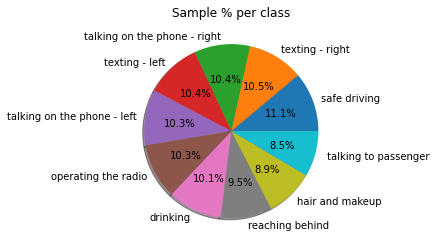

In [12]:
CLASSES = {"c0": "safe driving", "c1": "texting - right", "c2": "talking on the phone - right", "c3": "texting - left",
           "c4": "talking on the phone - left", "c5": "operating the radio", "c6": "drinking", "c7": "reaching behind",
           "c8": "hair and makeup", "c9": " talking to passenger"}
plt.pie(class_freq_count, autopct='%1.1f%%', shadow=True, labels=CLASSES.values())
plt.title('Sample % per class');
plt.show()

In [13]:
dataset = pd.read_csv('../input/state-farm-distracted-driver-detection/driver_imgs_list.csv')
dataset.head(5)

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


**Count of images in each Class From Class C0 to C9**

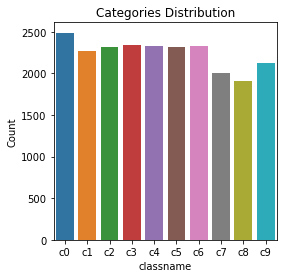

In [18]:
# Plot figure size
plt.figure(figsize = (4,4))
# Count the number of images per category
sns.countplot(x = 'classname', data = dataset)
# Change the Axis names
plt.ylabel('Count')
plt.title('Categories Distribution')
# Show plot
plt.show()

# **Overview of Dataset Images**

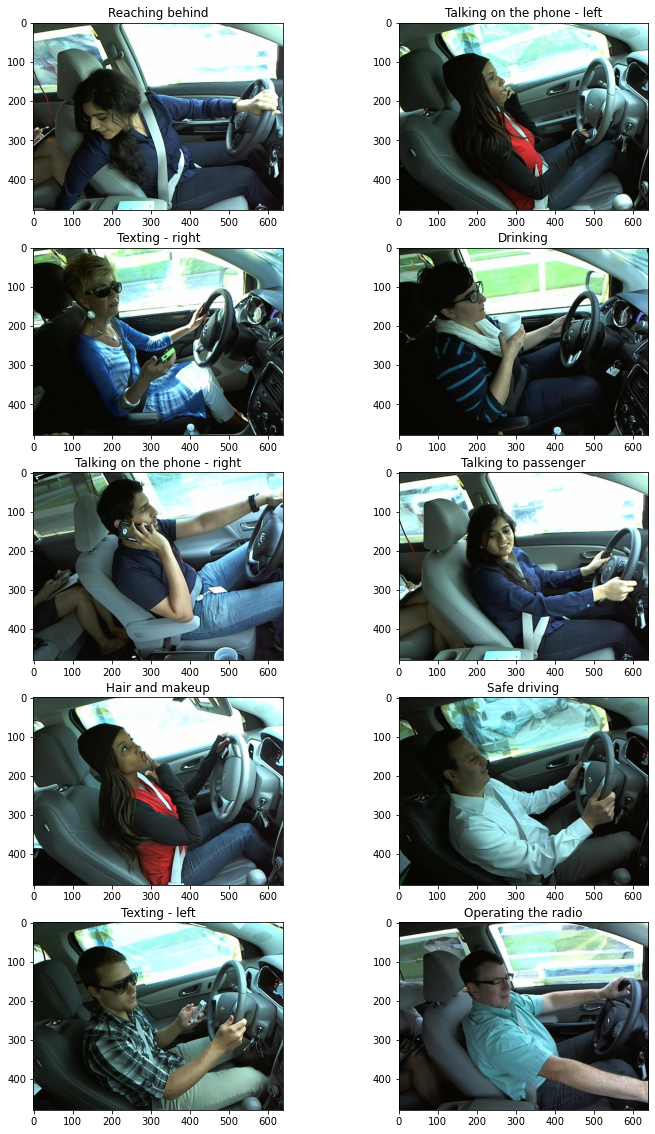

In [19]:
from matplotlib import image
import matplotlib.image as mpimg

activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}


plt.figure(figsize = (12, 20))
image_count = 1
BASE_URL = r'../input/state-farm-distracted-driver-detection/imgs/train/'
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(5, 2, image_count)
                image_count += 1
                image = mpimg.imread(BASE_URL + directory + '/' + file)
                plt.imshow(image)
                plt.title(activity_map[directory])

In [20]:
img_size1 = 240
img_size2 = 240

# **Creating Training and Testing Data**

In [21]:
#TRAINING DATA

training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(train_directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_size2,img_size1))
            training_data.append([new_img,class_num])

In [22]:
#TESTING DATA

testing_data = []
i = 0
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(img_size2,img_size1))
        testing_data.append([img,new_img])

In [23]:
create_training_data()

In [24]:
create_testing_data()

In [25]:
import random
random.shuffle(training_data)

In [26]:
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

In [27]:
import numpy as np
X = np.array(x).reshape(-1,img_size2,img_size1,1)
X[0].shape

(240, 240, 1)

In [28]:
y=np.array(y).reshape(-1,1)

# **Train-Test Split**

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [31]:
x_test.shape

(4485, 240, 240, 1)

In [32]:
y_test.shape

(4485, 1)

In [33]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train,num_classes=10)
Y_test = np_utils.to_categorical(y_test,num_classes=10)

In [34]:
Y_test.shape

(4485, 10)

In [35]:
Y_train.shape

(17939, 10)

In [36]:
x_train.shape

(17939, 240, 240, 1)

# **Vanilla CNN Model**

Creating the model

In [2]:
def create_model_v1():
    # Vanilla CNN model
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (240, 240, 1)))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    
    model.add(Dense(units = 1024, activation = 'relu'))
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dense(units = 10, activation = 'softmax'))
    
    
    return model

In [3]:
model_v1 = create_model_v1()

# More details about the layers
model_v1.summary()

# Compiling the model
model_v1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

**Training the Model**

In [39]:
# Training the Vanilla Model 
history_v1 = model_v1.fit(x_train, Y_train,epochs=10,batch_size=40,validation_data=(x_test , Y_test))

Epoch 1/10
449/449 [==============================] - 23s 52ms/step - loss: 11.2928 - accuracy: 0.8581 - val_loss: 0.1535 - val_accuracy: 0.9547
Epoch 2/10
449/449 [==============================] - 23s 51ms/step - loss: 0.0771 - accuracy: 0.9789 - val_loss: 0.0762 - val_accuracy: 0.9797
Epoch 3/10
449/449 [==============================] - 23s 51ms/step - loss: 0.0743 - accuracy: 0.9795 - val_loss: 0.1120 - val_accuracy: 0.9775
Epoch 4/10
449/449 [==============================] - 23s 51ms/step - loss: 0.2460 - accuracy: 0.9440 - val_loss: 0.2918 - val_accuracy: 0.9237
Epoch 5/10
449/449 [==============================] - 23s 51ms/step - loss: 0.0749 - accuracy: 0.9800 - val_loss: 0.1053 - val_accuracy: 0.9728
Epoch 6/10
449/449 [==============================] - 23s 51ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0902 - val_accuracy: 0.9779
Epoch 7/10
449/449 [==============================] - 23s 51ms/step - loss: 0.0353 - accuracy: 0.9925 - val_loss: 0.0883 - val_accuracy

**Plotting the Accuracy and Loss**

In [40]:
def plot_train_history(history):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

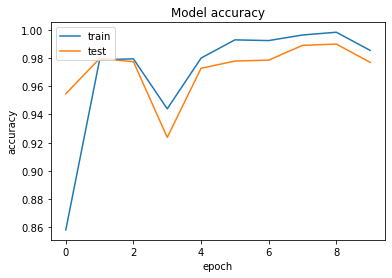

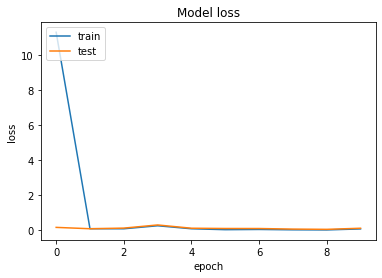

In [41]:
plot_train_history(history_v1)

Prediction

In [42]:
preds = model_v1.predict(np.array(testing_data[100][1]).reshape(-1,img_size2,img_size1,1))
test_data = np.array(testing_data[100][1]).reshape(-1,img_size2,img_size1,1)

preds = model_v1.predict(test_data)
preds

array([[8.86922226e-06, 9.75563049e-01, 3.27002708e-05, 1.00047225e-02,
        3.96589576e-06, 7.71393388e-06, 5.59047388e-04, 1.26072764e-02,
        1.19419885e-03, 1.85044482e-05]], dtype=float32)

Predicted: 1


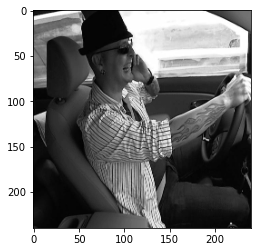

In [43]:
print('Predicted: {}'.format(np.argmax(preds)))

new_img = cv2.resize(testing_data[100][1],(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')
plt.show()

In [44]:
preds = model_v1.predict(np.array(testing_data[216][1]).reshape(-1,img_size2,img_size1,1))
test_data = np.array(testing_data[216][1]).reshape(-1,img_size2,img_size1,1)

preds = model_v1.predict(test_data)
preds

array([[3.9413434e-02, 8.6516258e-04, 6.0031889e-03, 7.6556350e-03,
        2.1481896e-02, 3.9038432e-04, 5.8243889e-03, 3.9384257e-02,
        1.7630023e-01, 7.0268142e-01]], dtype=float32)

Predicted: 9


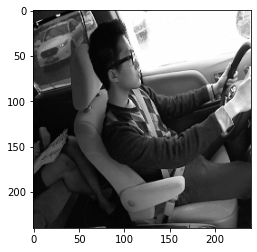

In [45]:
print('Predicted: {}'.format(np.argmax(preds)))
plt.show()
new_img = cv2.resize(testing_data[216][1],(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')


In [46]:
preds = model_v1.predict(np.array(testing_data[300][1]).reshape(-1,img_size2,img_size1,1))
test_data = np.array(testing_data[300][1]).reshape(-1,img_size2,img_size1,1)

preds = model_v1.predict(test_data)
preds

array([[3.6221942e-11, 1.3997472e-07, 8.7560373e-08, 9.9999535e-01,
        3.9586917e-06, 3.7744479e-07, 2.1790996e-13, 2.8190747e-11,
        9.3330989e-08, 4.7316923e-10]], dtype=float32)

Predicted: 3


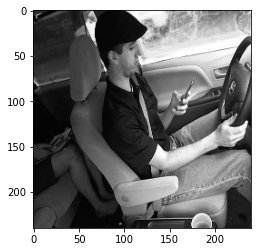

In [47]:
print('Predicted: {}'.format(np.argmax(preds)))
plt.show()
new_img = cv2.resize(testing_data[300][1],(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')


In [48]:
preds = model_v1.predict(np.array(testing_data[455][1]).reshape(-1,img_size2,img_size1,1))
test_data = np.array(testing_data[455][1]).reshape(-1,img_size2,img_size1,1)

preds = model_v1.predict(test_data)
preds

array([[1.12316575e-05, 2.50307028e-04, 1.45922883e-07, 5.68931460e-01,
        3.85973975e-03, 4.26827013e-01, 1.66696448e-10, 4.46777049e-05,
        7.52607739e-05, 1.63551064e-07]], dtype=float32)

Predicted: 3


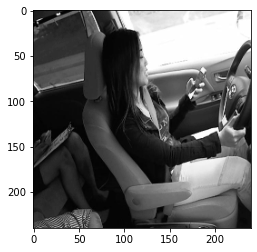

In [49]:
print('Predicted: {}'.format(np.argmax(preds)))
plt.show()
new_img = cv2.resize(testing_data[455][1],(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')


**Test Accuracy**

In [50]:
score = model_v1.evaluate(x_test, Y_test, verbose=1)
print('Score of V1 model: ', score)

141/141 [==============================] - 2s 13ms/step - loss: 0.1046 - accuracy: 0.9770
Score of V1 model:  [0.10460683703422546, 0.9770345687866211]


# **Vanilla CNN with Data Augmentation**

**Creating the model**

In [4]:
def create_model_v2():
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (240, 240, 3), data_format = 'channels_last'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units = 1024, activation = 'relu'))
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dense(units = 10, activation = 'softmax'))


    return model

In [5]:
model_v2 = create_model_v2()

# More details about the layers
model_v2.summary()

# Compiling the model
model_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 238, 238, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 117, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)           

In [6]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   validation_split = 0.2)

training_set = train_datagen.flow_from_directory('../input/state-farm-distracted-driver-detection/imgs/train', 
                                                 target_size = (240, 240), 
                                                 batch_size = 32,
                                                 subset = 'training')

validation_set = train_datagen.flow_from_directory('../input/state-farm-distracted-driver-detection/imgs/train', 
                                                   target_size = (240, 240), 
                                                   batch_size = 32,
                                                   subset = 'validation')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


# Creating directory to save the model

In [7]:
from keras.callbacks import ModelCheckpoint
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

**Training the model**

In [9]:
!rm -f saved_models/cnn_vanilla.hdf5

In [10]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("saved_models/cnn_vanilla.hdf5",save_best_only=True)
history = model_v2.fit_generator(training_set,
                         steps_per_epoch = 17943/32,
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = 4481/32,callbacks=[checkpoint_cb])

Epoch 1/10
561/560 [==============================] - 410s 730ms/step - loss: 1.3214 - accuracy: 0.5418 - val_loss: 0.6263 - val_accuracy: 0.7971
Epoch 2/10
561/560 [==============================] - 366s 652ms/step - loss: 0.3467 - accuracy: 0.8901 - val_loss: 0.2969 - val_accuracy: 0.9072
Epoch 3/10
561/560 [==============================] - 366s 652ms/step - loss: 0.2048 - accuracy: 0.9371 - val_loss: 0.1975 - val_accuracy: 0.9413
Epoch 4/10
561/560 [==============================] - 369s 658ms/step - loss: 0.1459 - accuracy: 0.9537 - val_loss: 0.1606 - val_accuracy: 0.9487
Epoch 5/10
561/560 [==============================] - 368s 657ms/step - loss: 0.1120 - accuracy: 0.9636 - val_loss: 0.1362 - val_accuracy: 0.9630
Epoch 6/10
561/560 [==============================] - 366s 652ms/step - loss: 0.1084 - accuracy: 0.9658 - val_loss: 0.1162 - val_accuracy: 0.9630
Epoch 7/10
561/560 [==============================] - 366s 653ms/step - loss: 0.0836 - accuracy: 0.9730 - val_loss: 0.1055 -

In [11]:
model=keras.models.load_model("saved_models/cnn_vanilla.hdf5")

In [12]:
model.save_weights('saved_models/cnn_vanilla.hdf5', overwrite=True)

In [13]:
model.save('saved_models/cnn_vanilla.hdf5')

Plotting the accuracy and loss

In [14]:
def plot_train_history(history):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

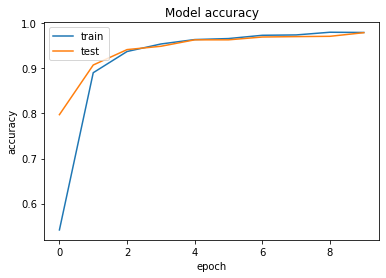

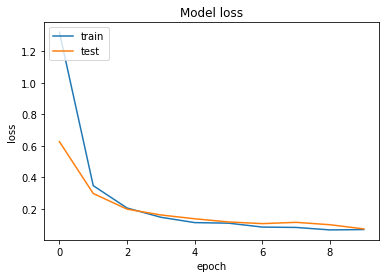

In [15]:
plot_train_history(history)

**Prediction on Test Data**

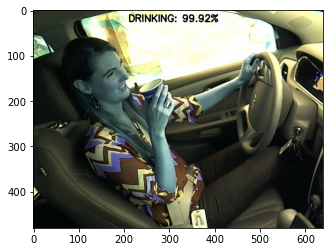

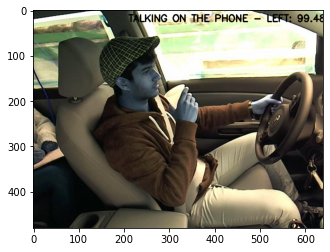

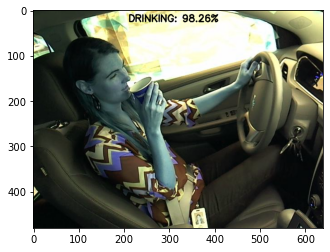

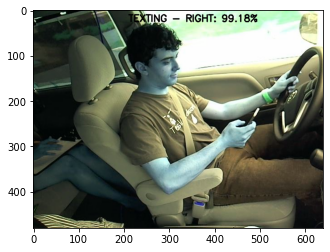

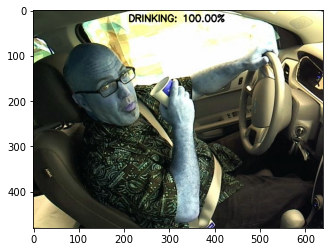

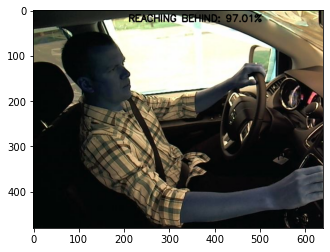

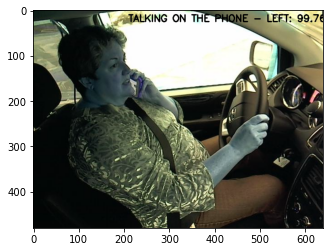

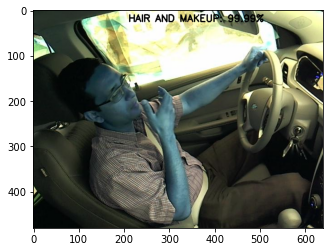

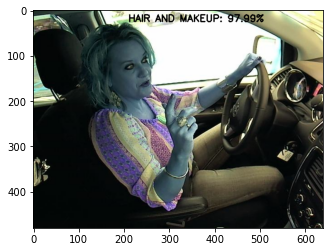

In [20]:
model = load_model('saved_models/cnn_vanilla.hdf5')

test_data_dir = r'../input/state-farm-distracted-driver-detection/imgs/test/'


class_labels = [
    "normal driving",
    "texting - right",
    "talking on the phone - right",
    "texting - left",
    "talking on the phone - left",
    "operating the radio",
    "drinking",
    "reaching behind",
    "hair and makeup",
    "talking to passenger"
]

file_names = np.random.choice(os.listdir(test_data_dir),30)

img_arrays = []

for file_name in file_names:
    img = image.load_img(os.path.join(test_data_dir, file_name), target_size=(240, 240))
    img_array = image.img_to_array(img)
    img_arrays.append(img_array)

img_arrays = np.array(img_arrays)
img_arrays = img_arrays.astype('float32') / 255
predictions = model.predict(img_arrays)


label_indexes = np.argmax(predictions, axis=1)
probabilities = np.max(predictions, axis=1)

for (file_name, label_index, probability) in zip(file_names, label_indexes, probabilities):
    if probability < 0.95:
        continue

    label_with_probability = "{}: {:.2f}%".format(class_labels[label_index], probability * 100)
    
    image = cv2.imread(os.path.join(test_data_dir, file_name))

    cv2.putText(image, label_with_probability.upper(), (210, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

    c=cv2.imwrite("annotated-results/" + file_name, image)
    
    plt.imshow(image)
    plt.show()